# Playground for EFEL with a trace

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

### Load Input and Output

In [3]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [4]:
out_traces = df_out_traces.to_numpy()
out_traces = out_traces[:4, 1:]
out_traces

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       [-64.51645049, -66.84945425, -64.64260378, ..., -80.91299455,
        -79.08977935, -82.01562544]])

In [82]:
inp_traces = df_inp_traces.to_numpy()
inp_traces = inp_traces[:4, 1:]
inp_traces

array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e-09, 2.e-09, 2.e-09, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

## eFEL playgroun

In [6]:
import efel

In [19]:
# efel.getFeatureNames()

In [8]:
out_trace = out_traces[1, :]
inp_trace = inp_traces[1, :]

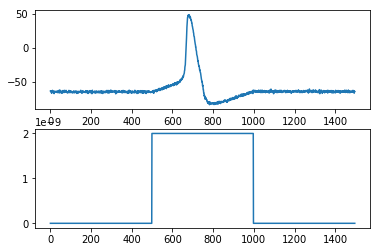

In [9]:
fig, ax = plt.subplots(2)
ax[0].plot(out_trace);
ax[1].plot(inp_trace);

In [20]:
voltage = out_trace
time = np.arange(0, len(voltage)/10, 0.1)

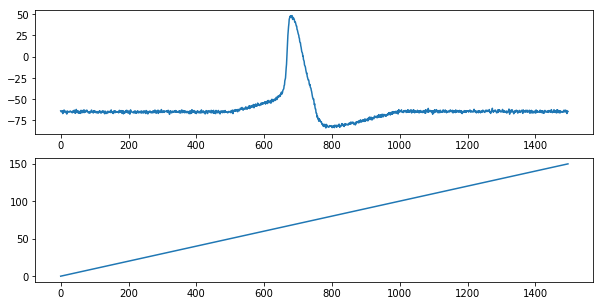

In [21]:
fig, ax = plt.subplots(2, figsize=(10,5))
ax[0].plot(voltage)
ax[1].plot(time);

In [28]:
time[500]

50.0

In [22]:
trace1 = {}
trace1['T'] = time
trace1['V'] = voltage

In [34]:
print(np.shape(trace1['T']))
print(np.shape(trace1['V']))

(1497,)
(1497,)


In [35]:
trace1['stim_start'] = [50]
trace1['stim_end'] = [100]

In [36]:
traces = [trace1]

In [37]:
traces_results = efel.getFeatureValues(traces, ['AP_amplitude', 'voltage_base'])

In [38]:
traces_results

[{'AP_amplitude': array([85.66269442]), 'voltage_base': array([-64.98160648])}]

In [40]:
feature_values = efel.getFeatureValues([trace1], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]


In [43]:
feature_values

{'AP_amplitude': array([85.66269442]),
 'peak_time': array([68.2]),
 'peak_voltage': array([48.24698601]),
 'AP_begin_time': array([65.8]),
 'AP_begin_width': array([2.6]),
 'AP_begin_voltage': array([-37.41570842]),
 'mean_frequency': array([54.94505495])}

In [59]:
val = feature_values.values()
val

dict_values([array([85.66269442]), array([68.2]), array([48.24698601]), array([65.8]), array([2.6]), array([-37.41570842]), array([54.94505495])])

In [53]:
np.shape(val)

()

In [68]:
values = np.array(list(feature_values.values())).transpose()
values

array([[ 85.66269442,  68.2       ,  48.24698601,  65.8       ,
          2.6       , -37.41570842,  54.94505495]])

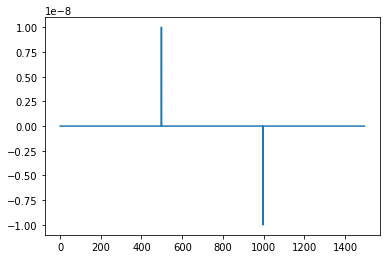

In [83]:
plt.plot(np.diff(inp_traces[0]));

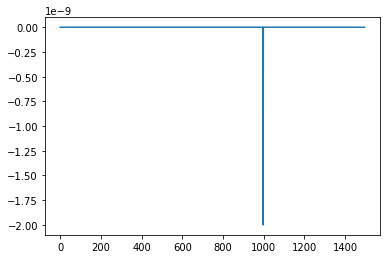

In [84]:
plt.plot(np.diff(inp_traces[2]));

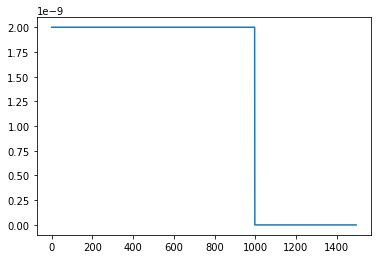

In [85]:
plt.plot(inp_traces[2]);